# Comparing the different experiments to see if exp5 is actually best

In [1]:
import torch
import test
from configs import Config
from torchvision.transforms import v2
from video_dataset import VideoDataset
import os
from torch.utils.data import DataLoader
from models.pytorch_r3d import Resnet3D18_basic
import json
import utils

2025-08-03 14:52:37.086020: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-03 14:52:37.095093: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-03 14:52:37.106004: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-03 14:52:37.109142: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-03 14:52:37.117752: I tensorflow/core/platform/cpu_feature_guar

In [2]:
torch.manual_seed(42)
model = 'r3d18'
split = 'asl100'
# exp_no = '6'.zfill(3)
exps = [str(i).zfill(3) for i in [5, 6, 7, 8, 9]]

root = '../data/WLASL2000'
labels=f'./preprocessed/labels/{split}'
# output=f'runs/{split}/{model}_exp{exp_no}'
outputs = [f'runs/{split}/{model}_exp{exp_no}' for exp_no in exps ]
# config_path = f'./configfiles/{split}/{model}_{exp_no}.ini'
config_paths = [f'./configfiles/{split}/{model}_{exp_no}.ini' for exp_no in exps]
# configs = Config(config_path)
# configs = [Config(config_path) for config_path in config_paths]

model_dict='best.pth'
classes_path = './wlasl_class_list.json'
label_suffix='_fixed_frange_bboxes_len.json'
# title = f'''Testting {model} on split {split} 
#               Experiment no: {exp_no} 
#               Raw videos at: {root}
#               Labels at: {labels}
#               Saving files to: {output}
#               Model weights: {model_dict}
#               {str(configs)}
#               \n
#           '''
titles = [f'''Testting {model} on split {split} 
              Experiment no: {exp_no} 
              Raw videos at: {root}
              Labels at: {labels}
              Saving files to: {output}
              Model weights: {model_dict}
              \n
          ''' for exp_no, output in zip(exps, outputs)
        ]          
          
for title in titles:
  print(title)

Testting r3d18 on split asl100 
              Experiment no: 005 
              Raw videos at: ../data/WLASL2000
              Labels at: ./preprocessed/labels/asl100
              Saving files to: runs/asl100/r3d18_exp005
              Model weights: best.pth
              

          
Testting r3d18 on split asl100 
              Experiment no: 006 
              Raw videos at: ../data/WLASL2000
              Labels at: ./preprocessed/labels/asl100
              Saving files to: runs/asl100/r3d18_exp006
              Model weights: best.pth
              

          
Testting r3d18 on split asl100 
              Experiment no: 007 
              Raw videos at: ../data/WLASL2000
              Labels at: ./preprocessed/labels/asl100
              Saving files to: runs/asl100/r3d18_exp007
              Model weights: best.pth
              

          
Testting r3d18 on split asl100 
              Experiment no: 008 
              Raw videos at: ../data/WLASL2000
              Labels at

In [4]:
# test.run_test_r3d18_1(configs,
#                       root=root,
#                       output=output,
#                       labels=labels,
#                       model_dict=model_dict,
#                       save=True)

for output in outputs:
  print(f'Model weights: {output}')
  test.run_test_r3d18_1(root=root,
                      output=output,
                      labels=labels,
                      model_dict=model_dict,
                      save=True)

Model weights: runs/asl100/r3d18_exp005


/home/luke/ExtraStorage/WLASL/lukes-code/test.py:125: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  r3d18_dict = torch.load(os.path.join(output,'checkpoints', model_dict)) #

Using device: cuda


Testing: 100%|██████████| 258/258 [00:25<00:00, 10.20it/s]


top-k average per class acc: 0.6218333333333333, 0.8483333333333333, 0.8916666666666667
Model weights: runs/asl100/r3d18_exp006
Using device: cuda


Testing: 100%|██████████| 258/258 [00:25<00:00, 10.19it/s]


top-k average per class acc: 0.6123333333333334, 0.8683333333333333, 0.9125
Model weights: runs/asl100/r3d18_exp007
Using device: cuda


Testing: 100%|██████████| 258/258 [00:25<00:00, 10.19it/s]


top-k average per class acc: 0.6085, 0.8625, 0.8958333333333333
Model weights: runs/asl100/r3d18_exp008
Using device: cuda


Testing: 100%|██████████| 258/258 [00:25<00:00, 10.17it/s]


top-k average per class acc: 0.6318333333333334, 0.8375, 0.8883333333333333
Model weights: runs/asl100/r3d18_exp009
Using device: cuda


Testing: 100%|██████████| 258/258 [00:25<00:00, 10.18it/s]

top-k average per class acc: 0.6051666666666667, 0.8416666666666667, 0.92


### Fairly interesting results, as it seems while weights 8 perform better on the test data (by about 1%) they perform worse on the validation data

In [5]:
#setup transforms
base_mean = [0.43216, 0.394666, 0.37645]
base_std = [0.22803, 0.22145, 0.216989]

r3d18_final = v2.Compose([
  v2.Lambda(lambda x: x.float() / 255.0),
  # v2.Lambda(lambda x: vt.normalise(x, base_mean, base_std)),
  v2.Normalize(mean=base_mean, std=base_std),
  v2.Lambda(lambda x: x.permute(1,0,2,3)) 
])

test_transforms = v2.Compose([v2.CenterCrop(224),
                              r3d18_final])


#setup data
test_instances = os.path.join(labels, 'test_instances_fixed_frange_bboxes_len.json')
test_classes = os.path.join(labels, 'test_classes_fixed_frange_bboxes_len.json')

test_set = VideoDataset(root, test_instances, test_classes,
                        transforms=test_transforms, num_frames=32)
test_loader = DataLoader(test_set, batch_size=1,shuffle=False,
                          num_workers=0)
num_classes = len(set(test_set.classes))
print(num_classes)

100


In [8]:

results = []
for output in outputs:
  #setup model
  print(f"Model: {output}")
  r3d18 = Resnet3D18_basic(num_classes=num_classes)
  r3d18_dict = torch.load(os.path.join(output,'checkpoints', model_dict), weights_only=True)
  # print(r3d18_dict)
  r3d18.load_state_dict(r3d18_dict)
  r3d18.cuda()
  r3d18.eval()

  accuracy, class_report = test.test_model(r3d18, test_loader)
  results.append((accuracy, class_report))
  print(f'Accuracy score: {accuracy}')

Model: runs/asl100/r3d18_exp005


Testing: 100%|██████████| 258/258 [00:25<00:00, 10.06it/s]


Accuracy score: 0.6162790697674418
Model: runs/asl100/r3d18_exp006


Testing: 100%|██████████| 258/258 [00:25<00:00, 10.23it/s]


Accuracy score: 0.6085271317829457
Model: runs/asl100/r3d18_exp007


Testing: 100%|██████████| 258/258 [00:25<00:00, 10.20it/s]


Accuracy score: 0.6007751937984496
Model: runs/asl100/r3d18_exp008


Testing: 100%|██████████| 258/258 [00:25<00:00, 10.16it/s]


Accuracy score: 0.6317829457364341
Model: runs/asl100/r3d18_exp009


Testing: 100%|██████████| 258/258 [00:25<00:00, 10.19it/s]

Accuracy score: 0.6085271317829457


### This is at least quite promissing, as it suggests the best weights are at least in exp8. Which was essentially a test to try reproduce exp5. So from here we can try rerun that experiment and see if it gets the same results. If it does, then there may be something there, and we can investigate. Othewise it suggests it is a non-determinism issue, however this seems unlikely given the size of the descretion between losses. And, the correlation between exp8 and exp 5

In [7]:
import gc

# Force garbage collection
gc.collect()

# For more aggressive cleanup (especially useful with PyTorch/TensorFlow)
import torch
torch.cuda.empty_cache()  # If using GPU
gc.collect()

0

Model :5


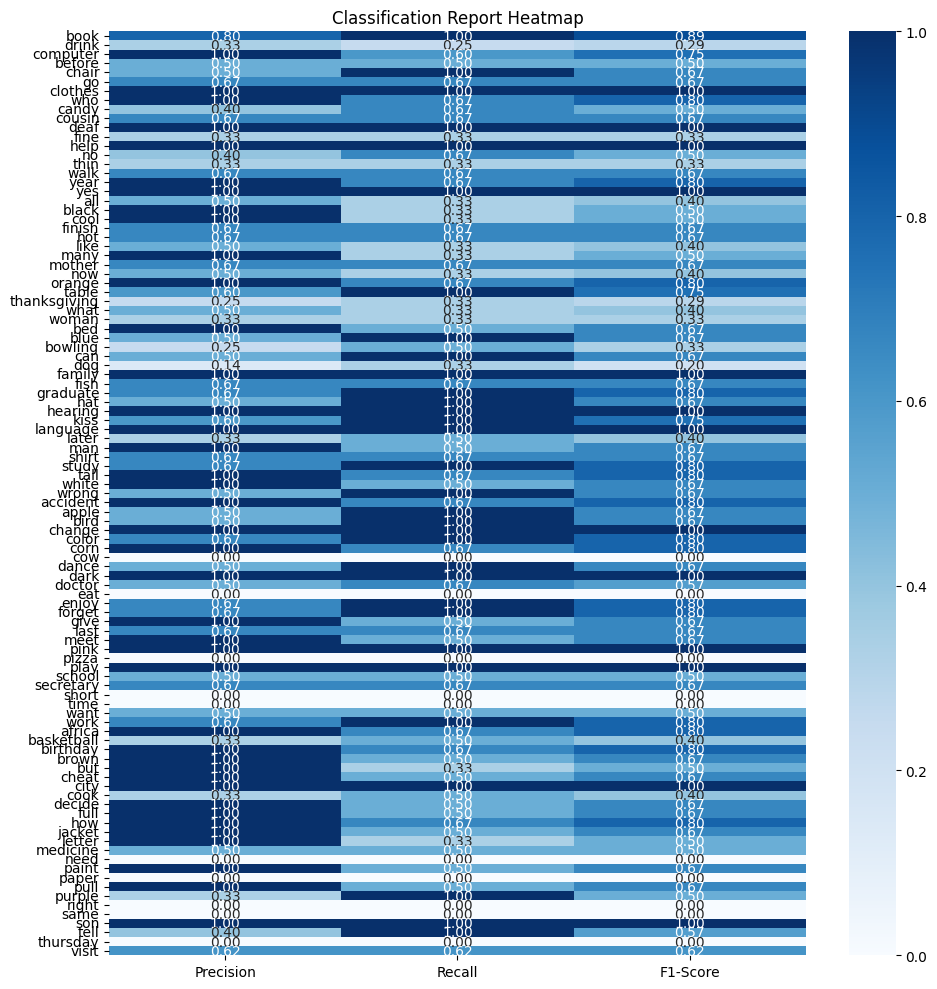

Model :6


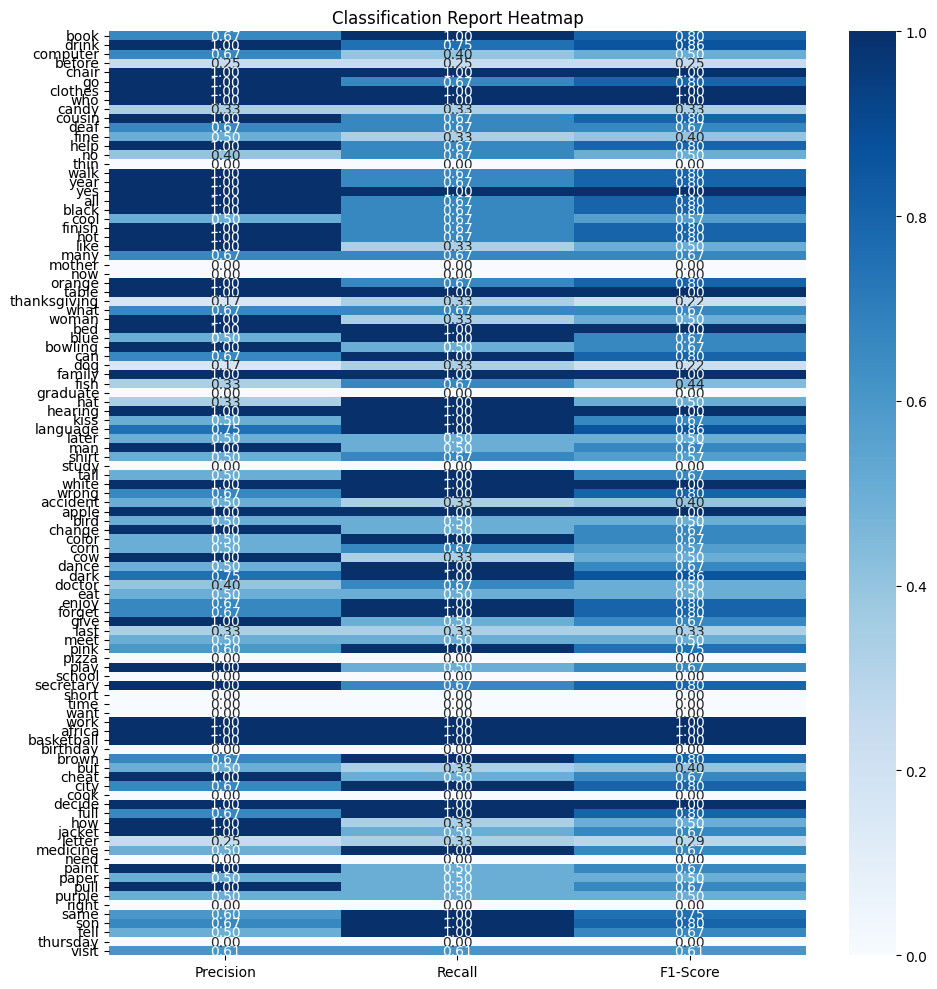

Model :7


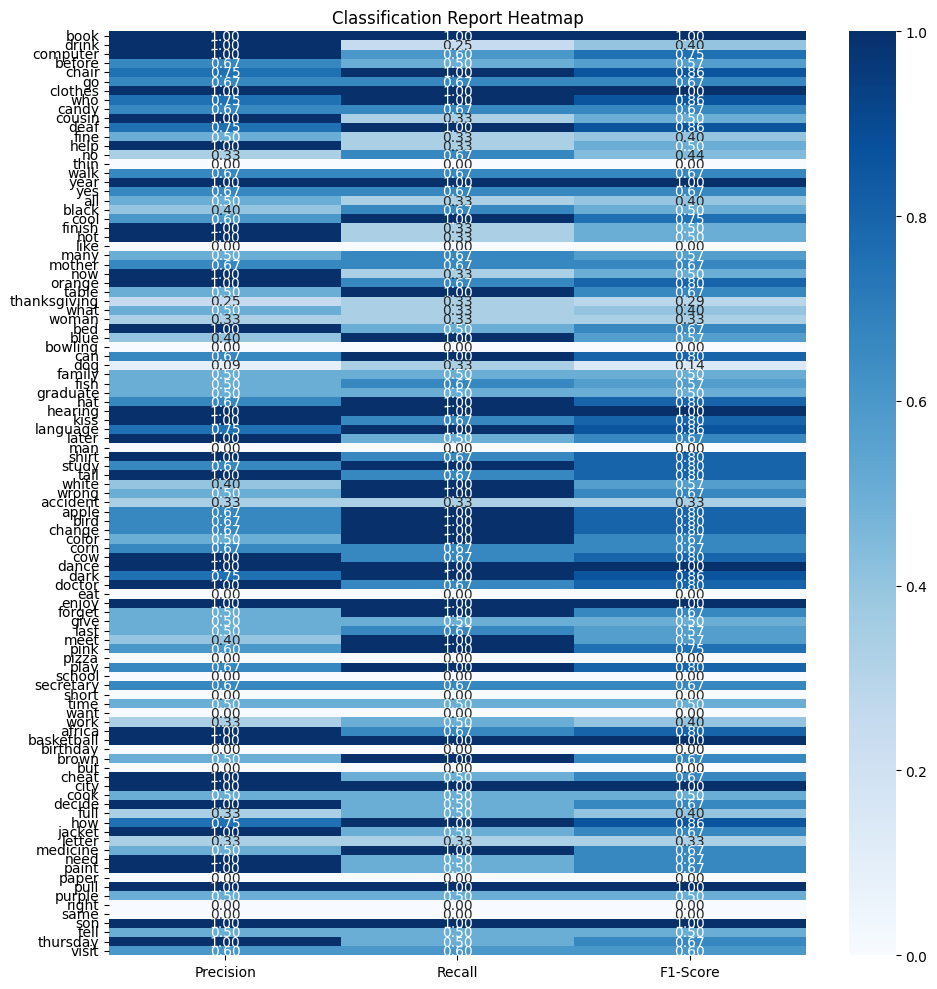

Model :8


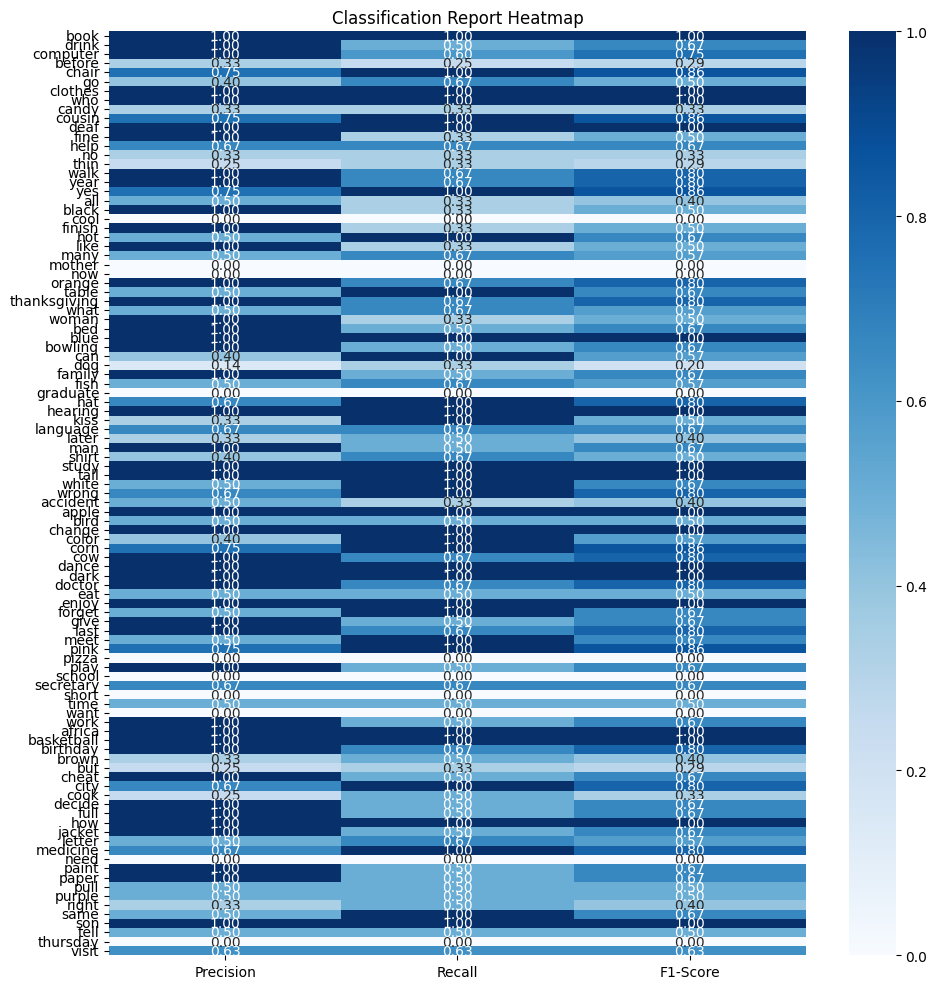

Model :9


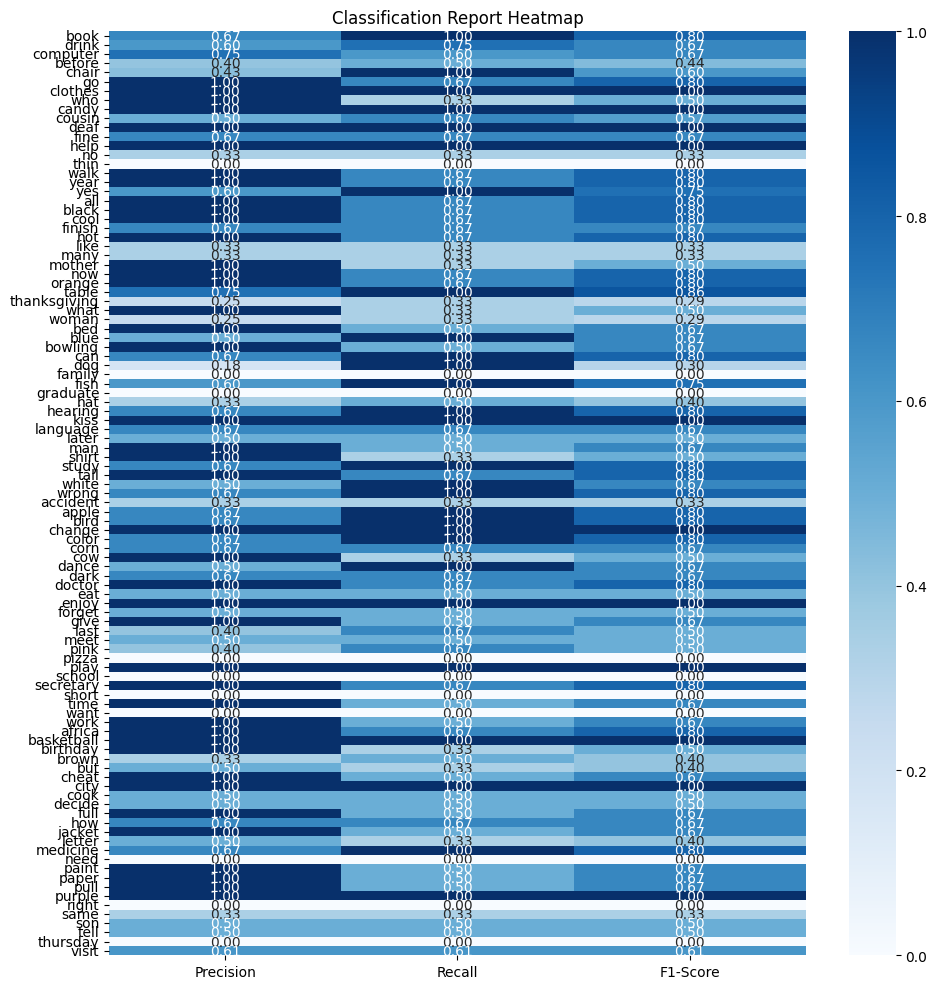

In [9]:
for i, (accuracy, class_report) in enumerate(results):
  print(f"Model :{i+5}") 
  test.plot_heatmap(class_report, classes_path)

Model :5


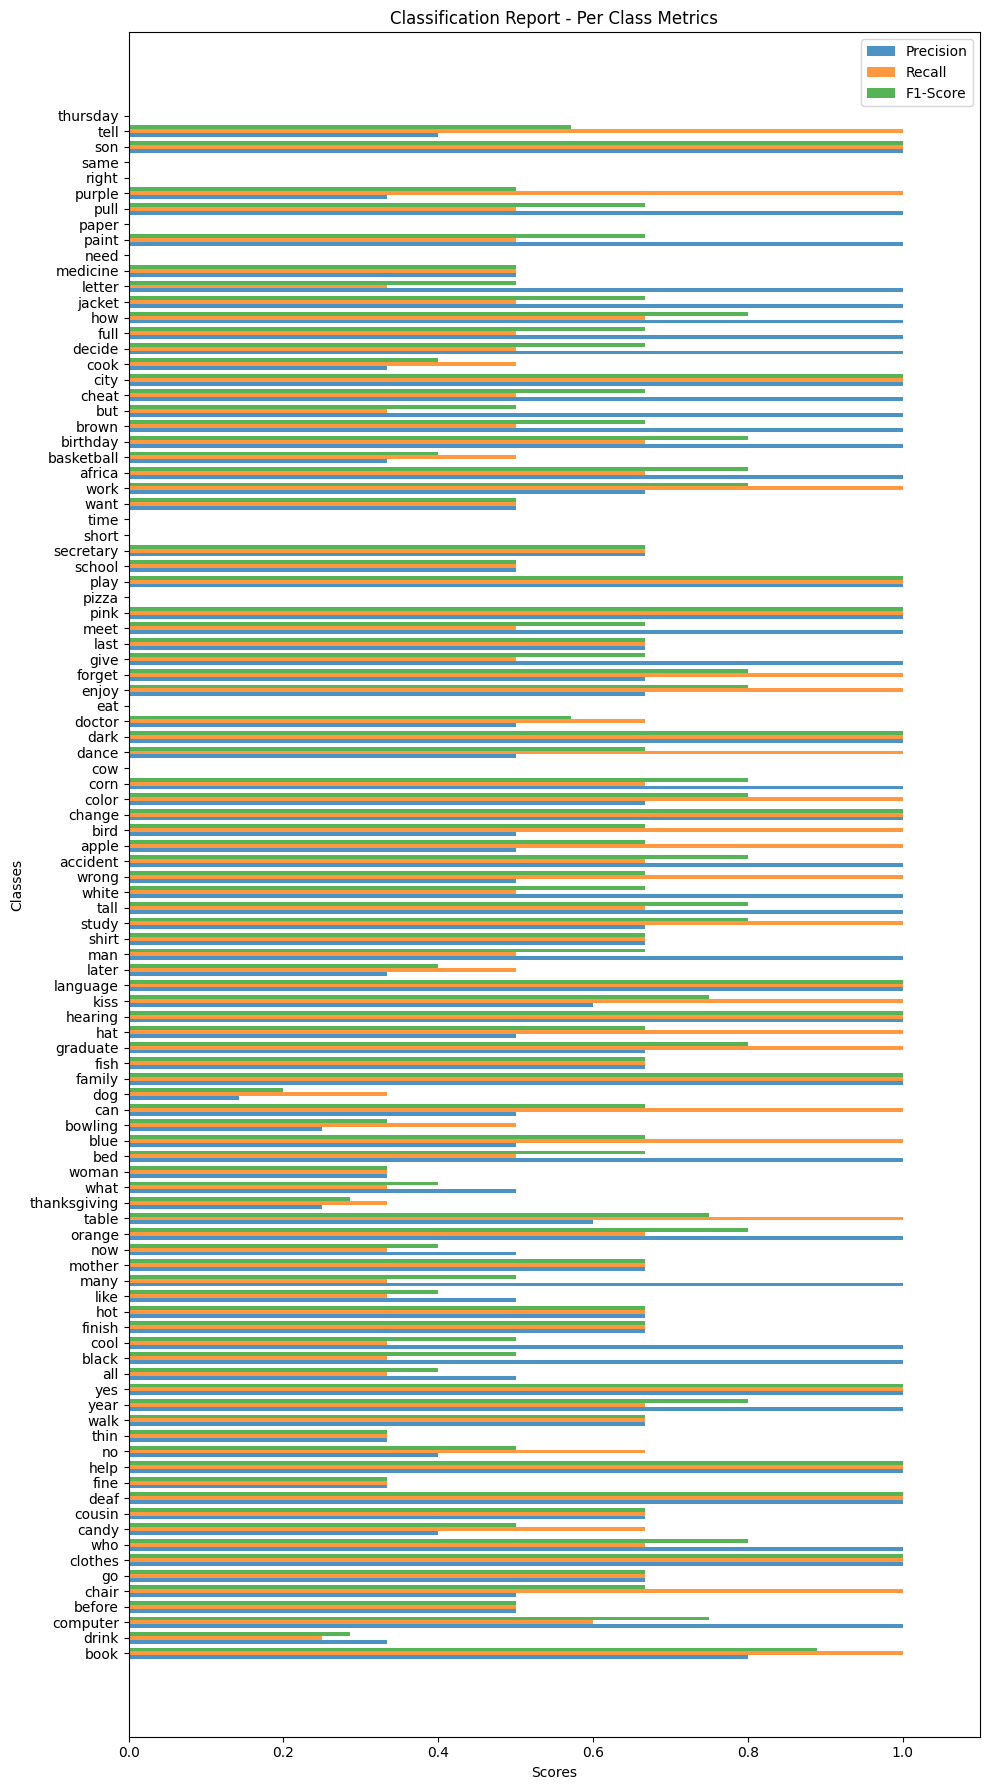

Model :6


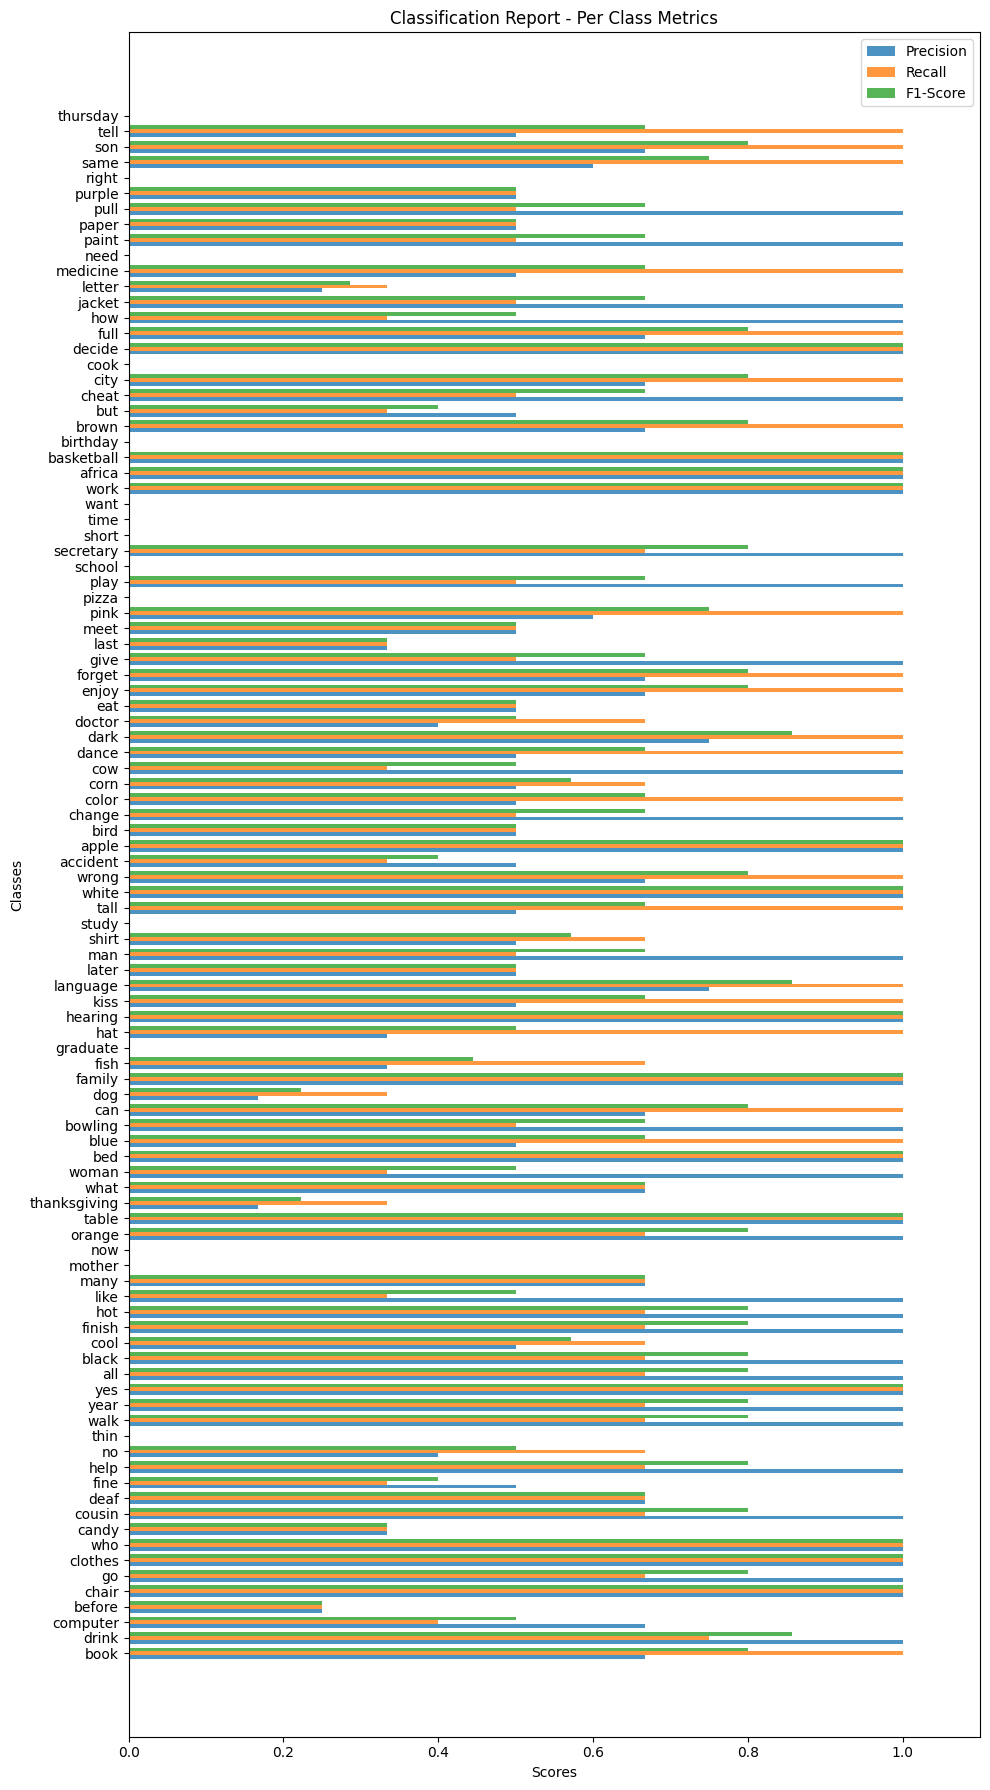

Model :7


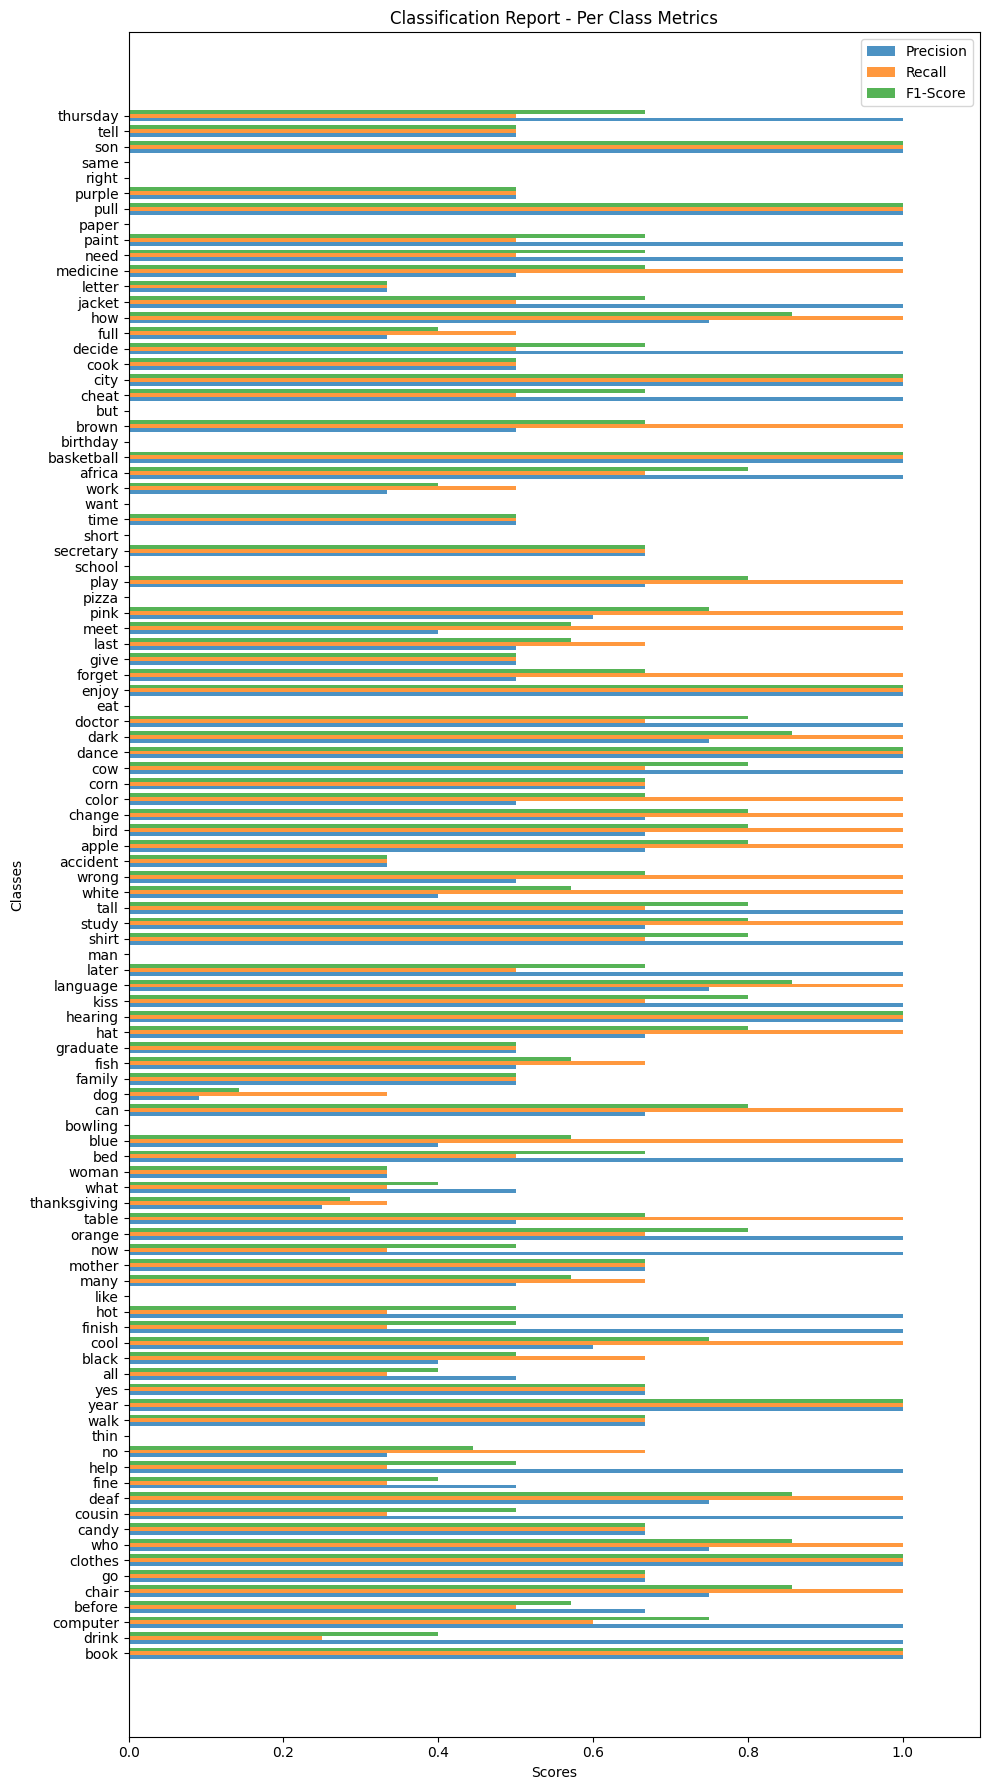

Model :8


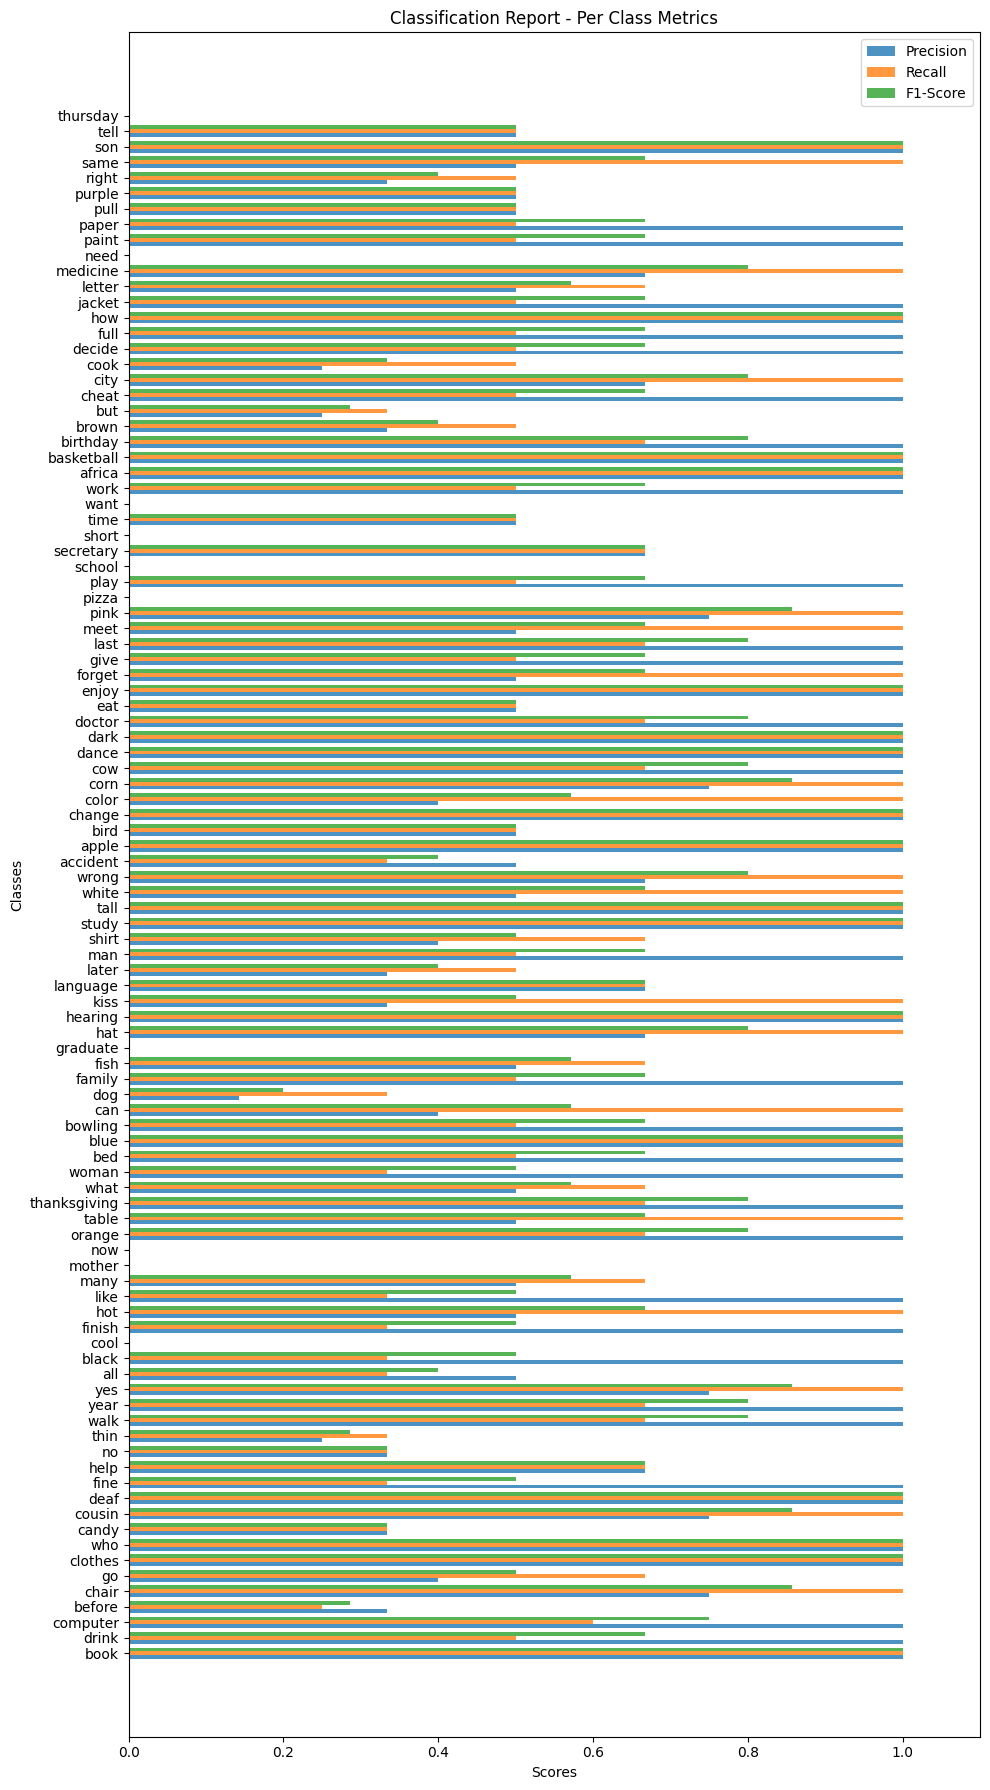

Model :9


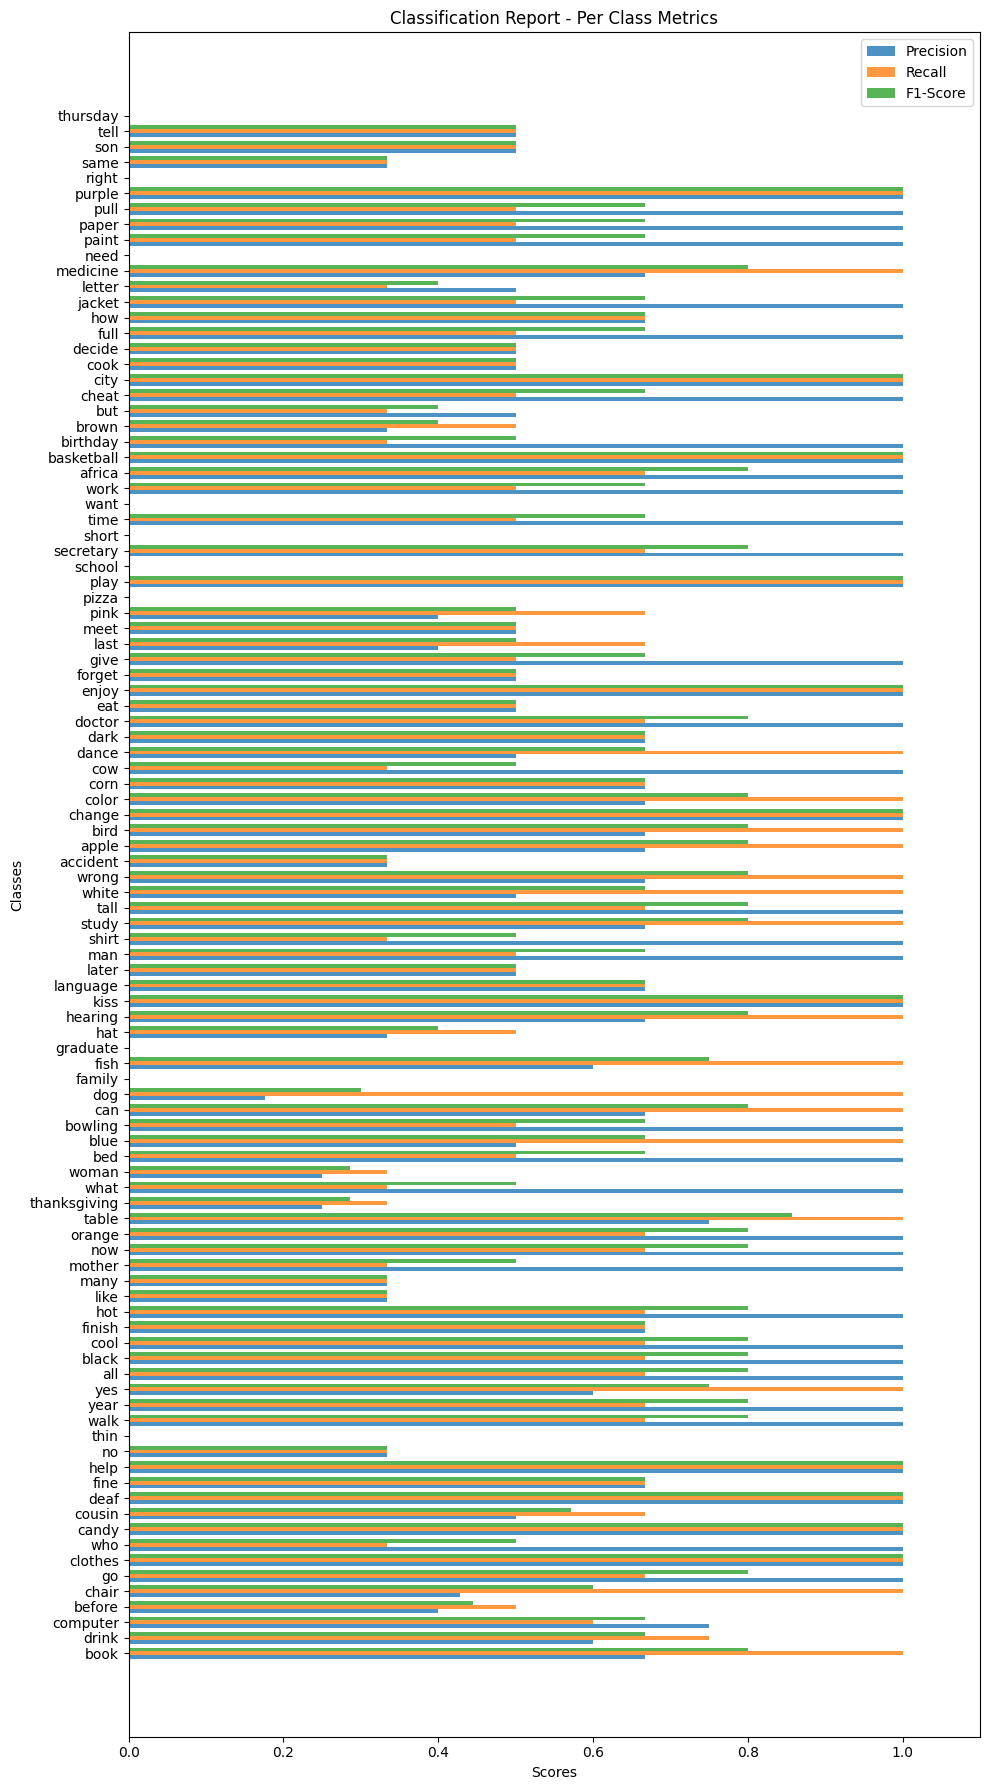

In [10]:
# test.plot_bar_graph(class_report, classes_path)
for i, (accuracy, class_report) in enumerate(results):
  print(f"Model :{i+5}") 
  test.plot_bar_graph(class_report, classes_path)

### A bit difficult to interpret